# Práctica 8 - Componentes Principales


In [2]:
import numpy as np
import pandas as pd
import seaborn.objects as so

## **Ejercicio 1**

In [3]:
columnas = ["Longitud", "Ancho"]
tortugas_pintadas = [
    [93, 76],
    [94, 78],
    [96, 80],
    [101, 84],
    [102, 85],
    [103, 82],
    [104, 83],
    [106, 83]
]

In [4]:
# Creamos un dataframe:
df = pd.DataFrame(data=tortugas_pintadas,columns=columnas)
df.head(10)

,Longitud,Ancho
0,93,76
1,94,78
2,96,80
3,101,84
4,102,85
5,103,82
6,104,83
7,106,83


### Ejercicio 1.a)

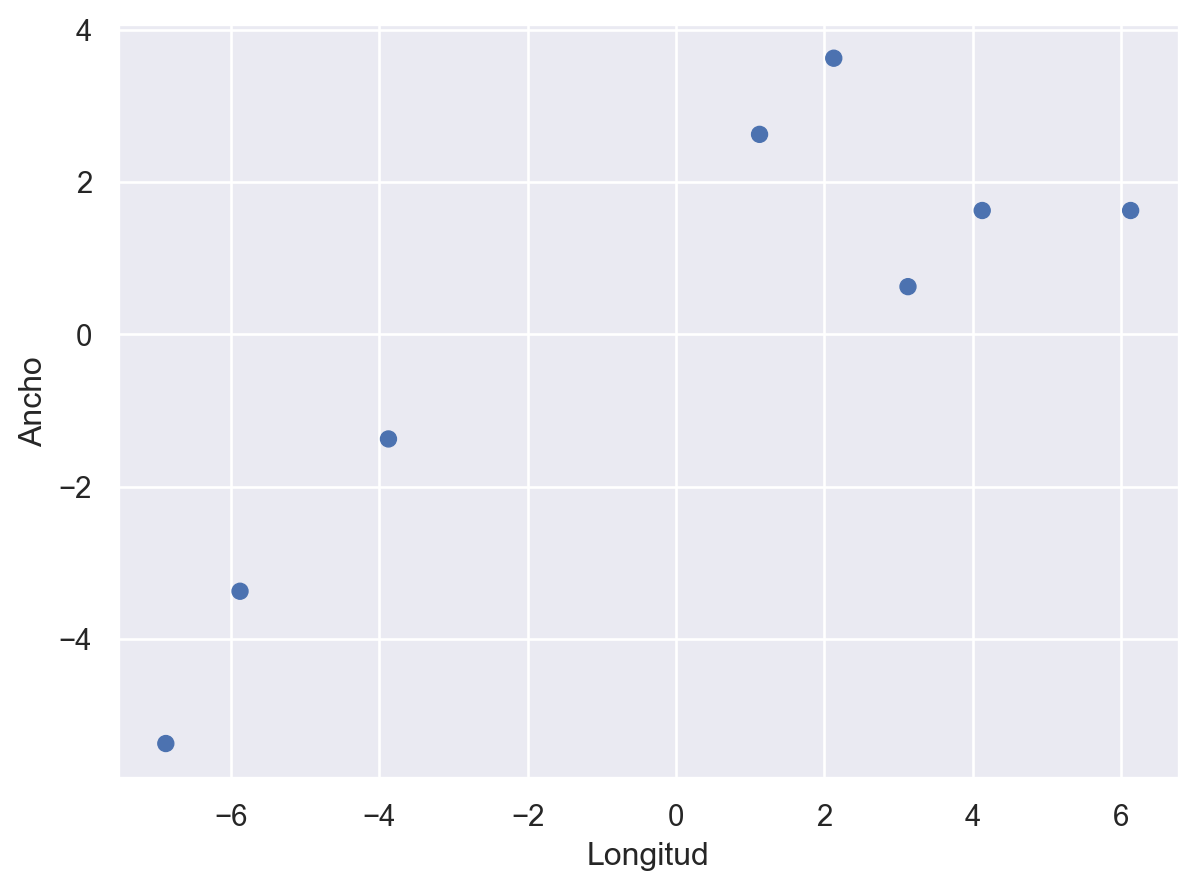

In [5]:
# Normalizamos las variables para que tengan media 0:
X_star = df - df.mean()

# Hacemos el diagrama de dispersión
(
    so.Plot(data = X_star, x = "Longitud", y = "Ancho")
    .add(so.Dot())
)

### Ejercicio 1.b)

In [6]:
# Calculamos la matriz de covarianza
Sigma = (X_star.T @ X_star) / len(X_star)

# Hallamos los autovalores y autovectores de la matriz de covarianza
gamma, U = np.linalg.eigh(Sigma)  # Usamos eigh porque A es simétrica. Podemos usar eig también

print("Autovalores:", gamma)
print("Autovectores:", U)

Autovalores: [ 1.68171008 27.66203992]
Autovectores: [[ 0.51170211 -0.85916293]
 [-0.85916293 -0.51170211]]


### Ejercicio 1.c)

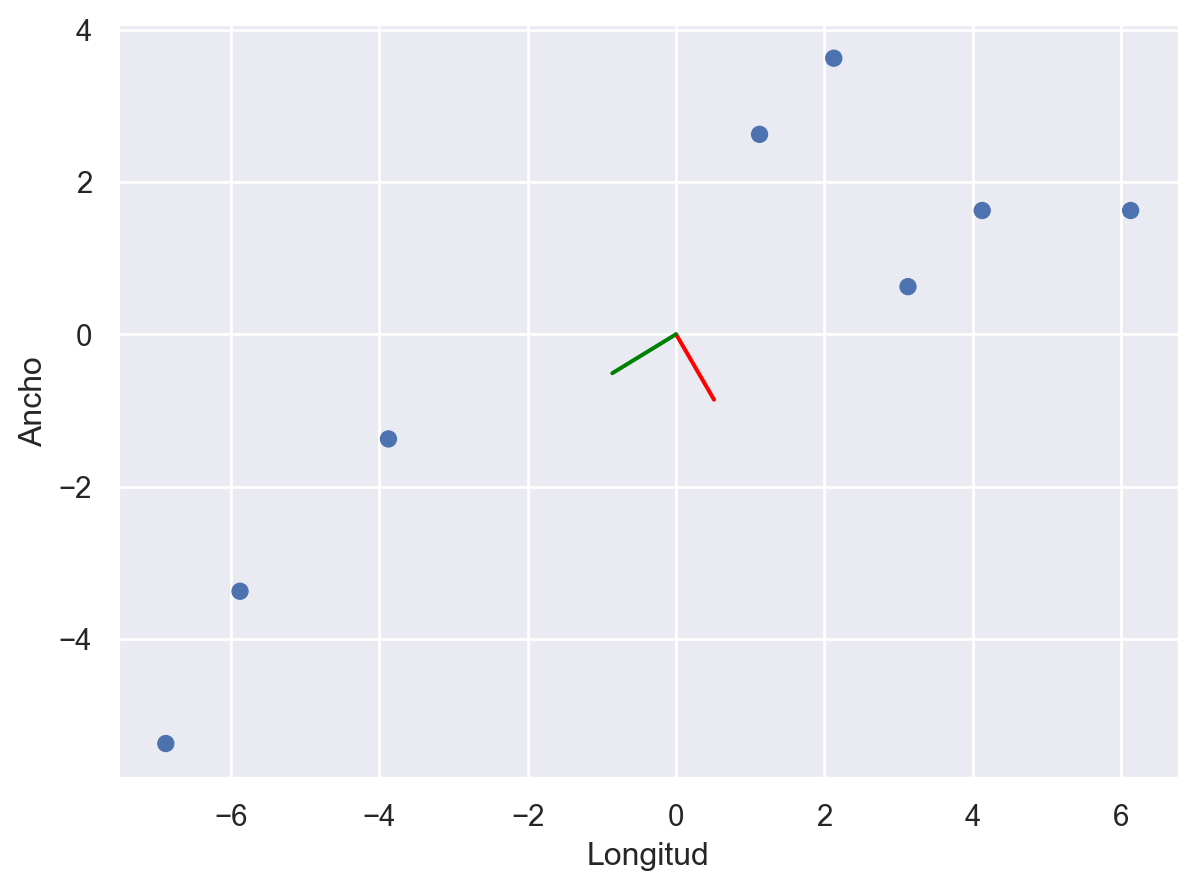

In [7]:
(
    so.Plot()
    .add(so.Dot(), x = X_star["Longitud"], y = X_star["Ancho"])
    .add(so.Line(color = "red"), x = [0, U[0,0]], y = [0, U[1,0]])
    .add(so.Line(color = "green"), x = [0, U[0,1]], y = [0, U[1,1]])
)

### Ejercicio 1.d)

#### Vemos que la información que aporta la variable 2 es la que más aporta a la varianza total, seguida por la variable 1.

### Ejercicio 1.e)
#### **PREGUNTAR**

## **Ejercicio 2**

### Ejercicio 2.a)

In [8]:
# Creamos la matriz de covarianza

valores = [[3, 1, 1],
           [1, 3, 1],
           [1, 1, 5]]

A =  pd.DataFrame(data=valores)

# Hallamos los autovalores y autovectores de la matriz de covarianza

gamma, U = np.linalg.eigh(A)  # Usamos eigh porque A es simétrica. Podemos usar eig también

print("Autovalores:", gamma)
print("Autovectores:", U)

Autovalores: [2. 3. 6.]
Autovectores: [[ 7.07106781e-01  5.77350269e-01  4.08248290e-01]
 [-7.07106781e-01  5.77350269e-01  4.08248290e-01]
 [-1.15695229e-16 -5.77350269e-01  8.16496581e-01]]


### Ejercicio 2.b)

In [9]:
# Damos la expresión de las componentes principales

print("Componente principal 1:", U[:,2])
print("Componente principal 2:", U[:,1])
print("Componente principal 3:", U[:,0])

Componente principal 1: [0.40824829 0.40824829 0.81649658]
Componente principal 2: [ 0.57735027  0.57735027 -0.57735027]
Componente principal 3: [ 7.07106781e-01 -7.07106781e-01 -1.15695229e-16]


##### La variabilidad indica que la tercera componente principal es la que más varianza explica, seguida por la segunda y por último la primera.

### Ejercicio 2.c)

In [10]:
# Hallamos los scores de las primeras dos componentes principales, con los valores  x1= 2, x2= 3, x3= 1

x = np.array([2, 3, 1])
print("Score de la primera componente principal:", x @ U[:,2])
print("Score de la primera segunda principal:", x @ U[:,1])

Score de la primera componente principal: 2.857738033247039
Score de la primera segunda principal: 2.3094010767585034


## **Ejercicio 3**

In [12]:
def min_cantidad_componentes_principales(file, p_acum):
    df = pd.read_csv(file)
    X_star = df - df.mean()
    Sigma = (X_star.T @ X_star)/len(X_star)
    gamma, U = np.linalg.eigh(Sigma)
    p_acum = 0
    i = 0
    while p_acum < p_acum:
        p_acum += gamma[-i]
        i += 1
    return i